In [1]:
import scanpy as sc
import os

In [2]:
PATH = "/home/pedrovideira/Desktop/spatial_ovary_new-main/Ovary_v4/data/Resultados/GEO_files/PP_GEO1.h5ad"

In [3]:
GEO_files = "/home/pedrovideira/Desktop/spatial_ovary_new-main/Ovary_v4/data/Resultados/GEO_files"

In [4]:
filenames = os.listdir(GEO_files)

In [5]:
order = [0,4,5,6,7,8,9,10,11,1,2,3]
filenames = [filenames[i] for i in order]

In [6]:
print(filenames)

['PP_GEO1.h5ad', 'PP_GEO2.h5ad', 'PP_GEO3.h5ad', 'PP_GEO4.h5ad', 'PP_GEO5.h5ad', 'PP_GEO6.h5ad', 'PP_GEO7.h5ad', 'PP_GEO8.h5ad', 'PP_GEO9.h5ad', 'PP_GEO10.h5ad', 'PP_GEO11.h5ad', 'PP_GEO12.h5ad']


In [7]:
adatas = [sc.read(str(GEO_files)+ "/" + i) for i in filenames]

/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/pedrovideira/Desktop/s

In [8]:
adatas.pop(7)

AnnData object with n_obs × n_vars = 331 × 2072
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [9]:
len(adatas)

11

In [10]:
numbers = [i for i in range(1, 13)]
print(numbers)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [11]:
import anndata as an

In [12]:
bdata = an.concat(adatas[0:], join="outer", fill_value = 0, uns_merge="first", label= "batch")
bdata.obs_names_make_unique()

/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [13]:
bdata

AnnData object with n_obs × n_vars = 3943 × 18262
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'batch'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    layers: 'counts'

In [14]:
sc.pp.combat(bdata)

/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/scanpy/preprocessing/_combat.py:199: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  batch_info = model.groupby(key).indices.values()
/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/scanpy/preprocessing/_combat.py:95: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  batch_items = model.groupby(batch_key).groups.items()
/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a

In [15]:
sc.pp.pca(bdata)

In [16]:
sc.pp.neighbors(bdata)

/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
sc.tl.umap(bdata)

In [25]:
sc.tl.leiden(bdata, key_added="clusters")

/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


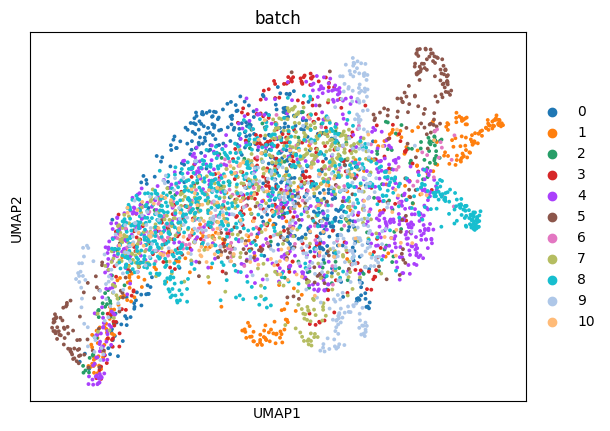

/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


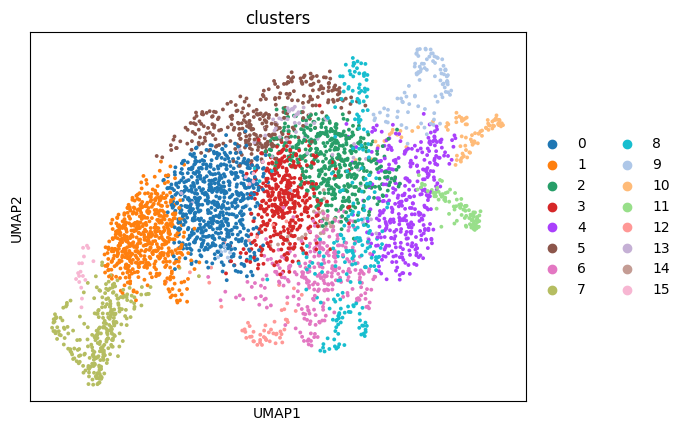

In [26]:
sc.pl.umap(bdata, color="batch")
sc.pl.umap(bdata, color= "clusters")

In [27]:
bdata

AnnData object with n_obs × n_vars = 3943 × 4109
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'batch', 'clusters'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial', 'umap', 'batch_colors', 'clusters_colors'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [28]:
bdata.obs["batch"]

GACTAAGTAGGCTCAC-1       0
ATAGTGAAGCGTTCTC-1       0
GCCGGGTTAGGGTCGC-1       0
CTCCGCCCACATGAGG-1       0
GAAATTGTCTCTATAA-1       0
                        ..
ACCCTCCCTTGCTATT-1-3    10
CCCTTTGACAGGTCTT-1-2    10
CTGCACAACTACATAT-1-3    10
ACAAATCGCACCGAAT-1-3    10
TCTATAGGTGGGTAAT-1      10
Name: batch, Length: 3943, dtype: category
Categories (11, object): ['0', '1', '2', '3', ..., '7', '8', '9', '10']

In [29]:
bdata.write_h5ad("/home/pedrovideira/Desktop/spatial_ovary_new-main/Ovary_v4/data/Resultados/GEO_concat_inner.h5ad")

In [87]:
from PIL import Image
import numpy as np

In [88]:
hirer = "C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\\Ovary_v4\\data\GEO1\\spatial\\II21472_tissue_hires_image.png"
lower = "C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\\Ovary_v4\\data\\GEO1\\spatial\\II21472_tissue_lowres_image.png"

imh = Image.open(hirer)
iml = Image.open(lower)

image_hirer = np.array(imh)
image_lower = np.array(iml)

c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  colo

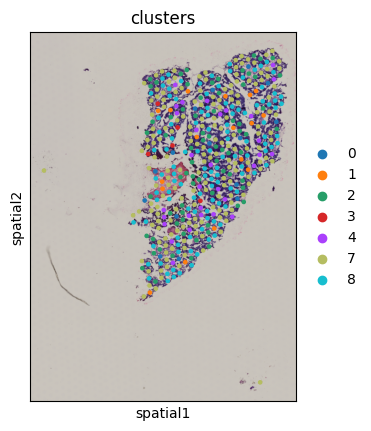

In [95]:
sc.pl.spatial(bdata[bdata.obs['batch'] == "0"], color = "clusters", img = image_hirer, spot_size=71.50812922491312, scale_factor=0.21351553)

In [99]:
bdata.write_h5ad("C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\\Ovary_v4\\data\\Resultados\\geo_concat.h5ad")

In [ ]:
#### resultado certo acima

In [103]:
sc.read("C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\\Ovary_v4\\data\\Resultados\\geo_concat.h5ad")

AnnData object with n_obs × n_vars = 3943 × 18262
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'batch', 'clusters'
    uns: 'batch_colors', 'clusters_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
bdatas

In [ ]:
bdata = bdatas[0].concatenate(bdatas[1:], join = 'outer', fill_value = 0, uns_merge="first")

In [307]:
bdata

AnnData object with n_obs × n_vars = 3943 × 4109
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'batch'
    var: 'feature_types', 'mt', 'gene_ids-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'gene_ids-1', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'gene_ids-10', 'n_cells_by_counts-10', 'mean_counts-10', 'log1p_mean_counts-10', 'pct_dropout_by_counts-10', 'total_counts-1

In [308]:
bdata.obsm

AxisArrays with keys: X_pca, X_umap, spatial, X_scanorama

In [309]:
sc.tl.pca(bdata)
sc.pp.neighbors(bdata, use_rep="X_scanorama")
sc.tl.umap(bdata)
sc.tl.leiden(bdata, key_added="clusters")

c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


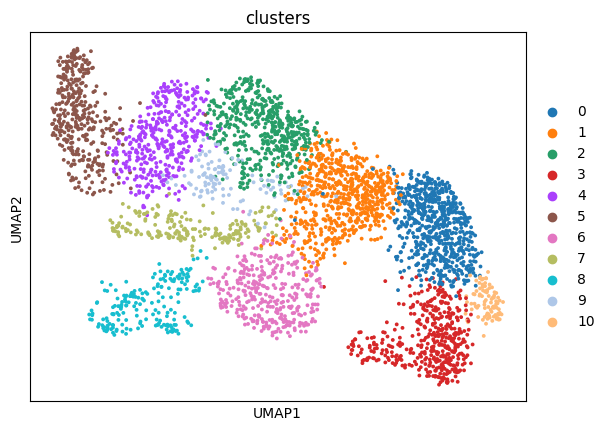

In [310]:
sc.pl.umap(bdata, color = "clusters")

c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


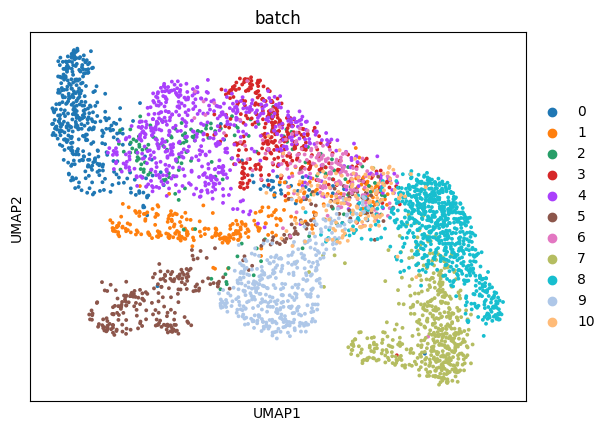

In [311]:
sc.pl.umap(bdata, color = "batch")

In [303]:
bdatas = scanorama.correct_scanpy(adatas, return_dimred = True)

Found 4109 genes among all datasets
[[0.         0.325      0.2244898  0.12325581 0.00697674 0.20588235
  0.         0.01162791 0.         0.00254453 0.00763359]
 [0.         0.         0.38095238 0.18571429 0.16785714 0.09285714
  0.11764706 0.03571429 0.05       0.08214286 0.        ]
 [0.         0.         0.         0.34013605 0.30612245 0.40816327
  0.12941176 0.00680272 0.         0.06802721 0.46564885]
 [0.         0.         0.         0.         0.21086262 0.04044118
  0.01764706 0.03833866 0.03194888 0.         0.1221374 ]
 [0.         0.         0.         0.         0.         0.08455882
  0.03529412 0.01551724 0.01091405 0.         0.20610687]
 [0.         0.         0.         0.         0.         0.
  0.42941176 0.22426471 0.00735294 0.39185751 0.72519084]
 [0.         0.         0.         0.         0.         0.
  0.         0.01176471 0.02352941 0.02798982 0.03816794]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.30566802 0.0

In [36]:
sc.external.pp.harmony_integrate(bdata, key= "batch")

2023-09-26 12:26:18,046 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-09-26 12:26:18,931 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-09-26 12:26:18,949 - harmonypy - INFO - Iteration 1 of 10
2023-09-26 12:26:19,829 - harmonypy - INFO - Iteration 2 of 10
2023-09-26 12:26:20,417 - harmonypy - INFO - Iteration 3 of 10
2023-09-26 12:26:20,986 - harmonypy - INFO - Iteration 4 of 10
2023-09-26 12:26:21,421 - harmonypy - INFO - Iteration 5 of 10
2023-09-26 12:26:21,785 - harmonypy - INFO - Iteration 6 of 10
2023-09-26 12:26:22,159 - harmonypy - INFO - Iteration 7 of 10
2023-09-26 12:26:22,518 - harmonypy - INFO - Iteration 8 of 10
2023-09-26 12:26:22,898 - harmonypy - INFO - Iteration 9 of 10
2023-09-26 12:26:23,231 - harmonypy - INFO - Iteration 10 of 10
2023-09-26 12:26:23,564 - harmonypy - INFO - Stopped before convergence


In [40]:
bdata

AnnData object with n_obs × n_vars = 3943 × 4109
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'batch', 'clusters'
    var: 'feature_types', 'mt', 'gene_ids-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'gene_ids-1', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'gene_ids-10', 'n_cells_by_counts-10', 'mean_counts-10', 'log1p_mean_counts-10', 'pct_dropout_by_counts-10', 'to

c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


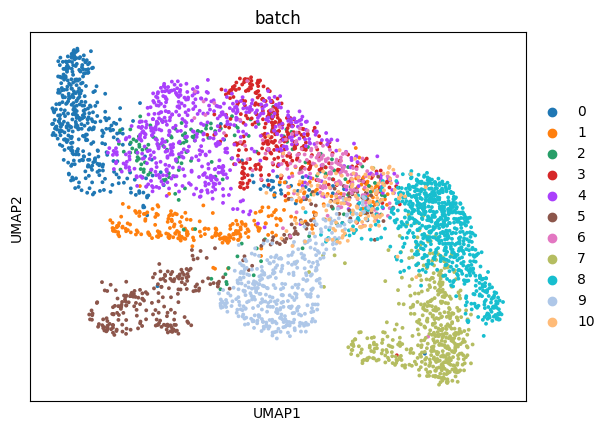

In [42]:
sc.pl.umap(bdata, color= "batch")

c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


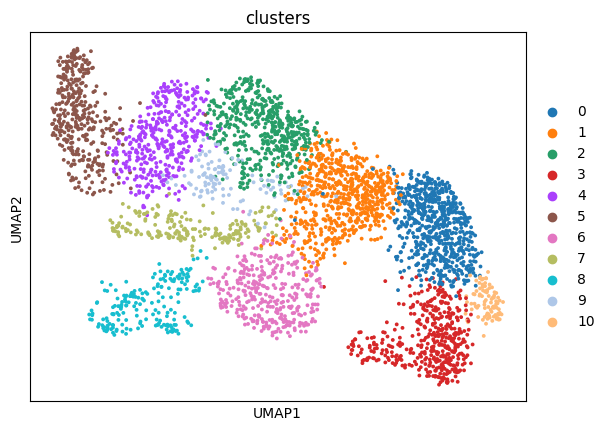

In [41]:
sc.pl.umap(bdata, color = "clusters")

c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


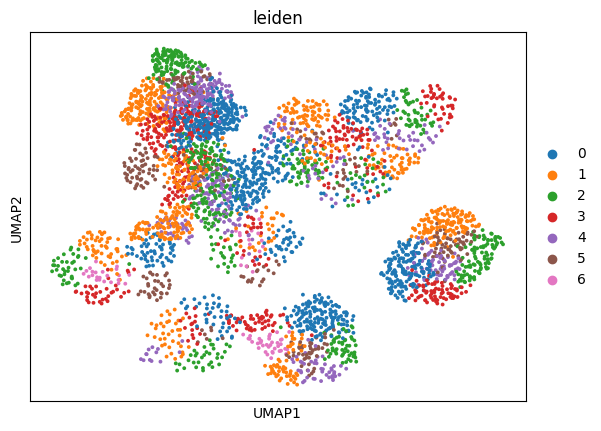

In [26]:
sc.pl.umap(adata, color = "leiden")

c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


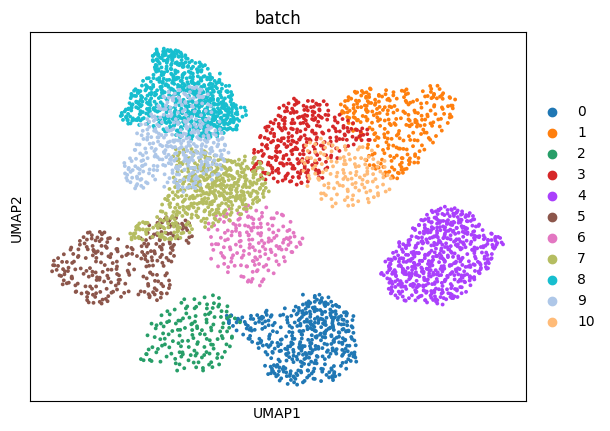

In [27]:
sc.pl.umap(adata, color = "batch")

In [34]:
adata.uns["spatial"]

{'library_id': {'images': {'hires': array([[[ 41,  39,  39, 255],
           [189, 178, 179, 255],
           [201, 189, 189, 255],
           ...,
           [ 74,  70,  69, 255],
           [ 63,  58,  59, 255],
           [  6,   6,   6, 255]],
   
          [[ 41,  39,  39, 255],
           [189, 179, 177, 255],
           [201, 191, 188, 255],
           ...,
           [201, 190, 189, 255],
           [170, 160, 159, 255],
           [ 18,  17,  17, 255]],
   
          [[ 41,  39,  39, 255],
           [189, 180, 177, 255],
           [201, 192, 188, 255],
           ...,
           [202, 192, 190, 255],
           [170, 162, 160, 255],
           [ 18,  17,  17, 255]],
   
          ...,
   
          [[198, 193, 186, 255],
           [198, 193, 186, 255],
           [198, 193, 185, 255],
           ...,
           [199, 194, 186, 255],
           [198, 192, 184, 255],
           [ 73,  71,  68, 255]],
   
          [[192, 186, 179, 255],
           [192, 186, 180, 255],
      